<a href="https://colab.research.google.com/github/vicctoriia/web_scraping_the_sopranos/blob/main/web_scraping_the_sopranos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## WEB SCRAPING + DATA CLEANING: 'THE SOPRANOS'

In [1]:
#Imports from libraries
import numpy as np
import pandas as pd
#pd.set_option("display.max_rows", None)
import re
import requests 
from requests import get  #requisicoes HTTP (obter o codigo html)
from bs4 import BeautifulSoup #extrair dados do HTML
from pandas.io.formats.style import Styler
from jinja2 import Environment, ChoiceLoader, FileSystemLoader
from IPython.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt

## Web scraping - IMDb

In [2]:
# specifying the URL containing the dataset 
url = 'https://www.imdb.com/title/tt0141842/episodes?season=1'
response = get(url)
print(response.text[:250])


 










<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         

        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">




        <scri


 **Extracting  hyperlinks within the webpage**

In [3]:
html_soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
episode_containers = html_soup.find_all('div', class_='info') 

**Example: Getting data from S01E01**

In [5]:
episode_containers[0].a['title']  

'Pilot'

In [6]:
episode_containers[0].meta['content'] 

'1'

In [7]:
episode_containers[0].find('span', class_='ipl-rating-star__rating').text.strip()  #Nota IMDB

'8.5'

In [8]:
episode_containers[0].find('span', class_='ipl-rating-star__total-votes').text.strip()  #Total de votos

'(8,050)'

In [9]:
episode_containers[0].find('div', class_='item_description').text.strip()  #Descrição do episódio

'A mobster passes out at a family barbecue and seeks therapy to understand why.'

**Selecting information for each episode in each season**

In [10]:
sopranos_episodes = []


for sn in range(1,7):

    response = get('https://www.imdb.com/title/tt0141842/episodes?season=' + str(sn))


    page_html = BeautifulSoup(response.text, 'html.parser')


    episode_containers = page_html.find_all('div', class_ = 'info')


    for episodes in episode_containers:

            season = sn
            episode_number = episodes.meta['content']
            title = episodes.a['title']
            airdate = episodes.find('div', class_='airdate').text.strip()
            rating = episodes.find('span', class_='ipl-rating-star__rating').text
            total_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
            desc = episodes.find('div', class_='item_description').text.strip()

            episode_data = [season, episode_number, title, airdate, rating, total_votes, desc]

            sopranos_episodes.append(episode_data)

In [11]:
sopranos_episodes  #take a look

[[1,
  '1',
  'Pilot',
  '10 Jan. 1999',
  '8.5',
  '(8,050)',
  'A mobster passes out at a family barbecue and seeks therapy to understand why.'],
 [1,
  '2',
  '46 Long',
  '17 Jan. 1999',
  '8.4',
  '(6,567)',
  "Tony is getting fed up with his mother. Brendan Filone acts against Tony's wishes. Salvatore and Paulie try to track down A.J.'s teacher's stolen car."],
 [1,
  '3',
  'Denial, Anger, Acceptance',
  '24 Jan. 1999',
  '8.7',
  '(6,394)',
  "Tony encourages an unwanted son-in-law to divorce, Carmela learns another secret of Tony's, Meadow experiments with speed to study for the SATs, and Chris and Brendan find out the price of disrespecting Junior."],
 [1,
  '4',
  'Meadowlands',
  '31 Jan. 1999',
  '8.7',
  '(6,182)',
  "Jackie's death leaves a power vacuum, Brendan's death leaves Chris fearing for his life, and Anthony's discovery of what his father really does leaves him confused."],
 [1,
  '5',
  'College',
  '7 Feb. 1999',
  '9.0',
  '(6,969)',
  'While visiting colleges

In [12]:
sopranos_episodes = pd.DataFrame(sopranos_episodes, columns = ['season', 'episode_number', 'title', 'airdate', 'rating', 'total_votes', 'desc'])  
sopranos_episodes  #Converting to a pd.DataFrame

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,10 Jan. 1999,8.5,"(8,050)",A mobster passes out at a family barbecue and ...
1,1,2,46 Long,17 Jan. 1999,8.4,"(6,567)",Tony is getting fed up with his mother. Brenda...
2,1,3,"Denial, Anger, Acceptance",24 Jan. 1999,8.7,"(6,394)",Tony encourages an unwanted son-in-law to divo...
3,1,4,Meadowlands,31 Jan. 1999,8.7,"(6,182)","Jackie's death leaves a power vacuum, Brendan'..."
4,1,5,College,7 Feb. 1999,9.0,"(6,969)","While visiting colleges with Meadow, Tony spot..."
...,...,...,...,...,...,...,...
81,6,17,Walk Like a Man,6 May 2007,8.9,"(4,543)",Christopher's father-in-law is the unwitting c...
82,6,18,Kennedy and Heidi,13 May 2007,9.2,"(5,378)",Tony travels to Las Vegas after a tragedy occurs.
83,6,19,The Second Coming,20 May 2007,9.3,"(5,037)",Tony fails to reason with Phil as more problem...
84,6,20,The Blue Comet,3 Jun. 2007,9.6,"(6,229)",The allegiance of those closest to Tony is put...


## Web scraping - Wikipedia

In [13]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_awards_and_nominations_received_by_The_Sopranos"
table_class="wikitable sortable plainrowheaders jquery-tablesorter"
response= requests.get(wikiurl)
print(response.status_code)

200


In [14]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table',{'class':"wikitable"})

In [15]:
df = pd.read_html(str(table))

df = pd.DataFrame(df[0])
df

,Award,Year[a],Category,Nominee(s),Result,Ref.
0,ALMA Awards,2001,Outstanding Actress in a Television Series,Jamie-Lynn Sigler,Nominated,[7]
1,ALMA Awards,2002,Outstanding Actress in a Television Series,Jamie-Lynn Sigler,Nominated,[8]
2,American Cinema Editors Awards,2000,Best Edited One-Hour Series for Television,"William B. Stich (for ""I Dream of Jeannie Cusa...",Nominated,[9]
3,American Cinema Editors Awards,2001,Best Edited One-Hour Series for Television,"Sidney Wolinsky (for ""Funhouse"")",Nominated,[10]
4,American Cinema Editors Awards,2002,Best Edited One-Hour Series for Television,"Conrad Gonzalez (for ""Pine Barrens"")",Won,[11]
...,...,...,...,...,...,...
271,Writers Guild of America Awards,2003,Episodic Drama,"Robin Green and Mitchell Burgess (for ""Whoever...",Nominated,[108]
272,Writers Guild of America Awards,2005,Episodic Drama,"Terence Winter (for ""Long Term Parking"")",Nominated,[109]
273,Writers Guild of America Awards,2007,Dramatic Series,The Sopranos[Nom 37],Won,[110]
274,Writers Guild of America Awards,2008,Dramatic Series,The Sopranos[Nom 38],Nominated,[111]


## Data Cleaning

**First DataFrame - IMDb**

In [16]:
sopranos_episodes

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,10 Jan. 1999,8.5,"(8,050)",A mobster passes out at a family barbecue and ...
1,1,2,46 Long,17 Jan. 1999,8.4,"(6,567)",Tony is getting fed up with his mother. Brenda...
2,1,3,"Denial, Anger, Acceptance",24 Jan. 1999,8.7,"(6,394)",Tony encourages an unwanted son-in-law to divo...
3,1,4,Meadowlands,31 Jan. 1999,8.7,"(6,182)","Jackie's death leaves a power vacuum, Brendan'..."
4,1,5,College,7 Feb. 1999,9.0,"(6,969)","While visiting colleges with Meadow, Tony spot..."
...,...,...,...,...,...,...,...
81,6,17,Walk Like a Man,6 May 2007,8.9,"(4,543)",Christopher's father-in-law is the unwitting c...
82,6,18,Kennedy and Heidi,13 May 2007,9.2,"(5,378)",Tony travels to Las Vegas after a tragedy occurs.
83,6,19,The Second Coming,20 May 2007,9.3,"(5,037)",Tony fails to reason with Phil as more problem...
84,6,20,The Blue Comet,3 Jun. 2007,9.6,"(6,229)",The allegiance of those closest to Tony is put...


In [17]:
sopranos_episodes['rating'].astype #should be 'float'

<bound method NDFrame.astype of 0     8.5
1     8.4
2     8.7
3     8.7
4     9.0
     ... 
81    8.9
82    9.2
83    9.3
84    9.6
85    9.3
Name: rating, Length: 86, dtype: object>

In [18]:
sopranos_episodes['rating'] = pd.to_numeric(sopranos_episodes['rating'], downcast="float") #making 'rating' numeric 

In [19]:
sopranos_episodes['episode_number'] = pd.to_numeric(sopranos_episodes['episode_number'], downcast="integer") #making 'episode_number' numeric 

In [20]:
vz = sopranos_episodes.pivot(index='season', columns='episode_number', values='rating') #creating a pivot table

Text(0.5, 1.0, 'The Sopranos - IMDb rating')

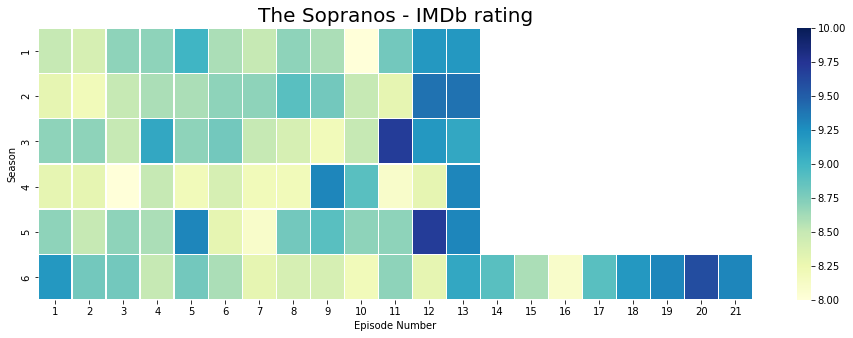

In [21]:
#Now the data is ready for visualization

plt.figure(figsize = (16,5))

ax = sns.heatmap(vz,  cmap="YlGnBu", linewidths=.5, vmin=8.0, vmax=10.0)

plt.xlabel("Episode Number", fontsize = 10) 
plt.ylabel("Season", fontsize = 10) 
ax.set_title('The Sopranos - IMDb rating', fontsize = 20)

In [22]:
vz.mean(axis=1) #average ratings per season

season
1    8.684615
2    8.684616
3    8.776922
4    8.453847
5    8.792307
6    8.761905
dtype: float32

In [23]:
vz.style.highlight_max(color = 'lightblue', axis = 1) #the highest ratings

episode_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
season,,,,,,,,,,,,,,,,,,,,,
1,8.500000,8.400000,8.700000,8.700000,9.000000,8.600000,8.500000,8.700000,8.600000,8.000000,8.800000,9.200000,9.200000,nan,nan,nan,nan,nan,nan,nan,nan
2,8.300000,8.200000,8.500000,8.600000,8.600000,8.700000,8.700000,8.900000,8.800000,8.500000,8.300000,9.400000,9.400000,nan,nan,nan,nan,nan,nan,nan,nan
3,8.700000,8.700000,8.500000,9.100000,8.700000,8.800000,8.500000,8.400000,8.200000,8.500000,9.700000,9.200000,9.100000,nan,nan,nan,nan,nan,nan,nan,nan
4,8.300000,8.300000,7.900000,8.500000,8.200000,8.400000,8.200000,8.200000,9.300000,8.900000,8.100000,8.300000,9.300000,nan,nan,nan,nan,nan,nan,nan,nan
5,8.700000,8.500000,8.700000,8.600000,9.300000,8.300000,8.100000,8.800000,8.900000,8.700000,8.700000,9.700000,9.300000,nan,nan,nan,nan,nan,nan,nan,nan
6,9.200000,8.800000,8.800000,8.500000,8.800000,8.600000,8.300000,8.400000,8.400000,8.200000,8.700000,8.300000,9.100000,8.900000,8.600000,8.100000,8.900000,9.200000,9.300000,9.600000,9.300000


**Second DataFrame - Wikipedia**

In [24]:
df.head()

,Award,Year[a],Category,Nominee(s),Result,Ref.
0,ALMA Awards,2001,Outstanding Actress in a Television Series,Jamie-Lynn Sigler,Nominated,[7]
1,ALMA Awards,2002,Outstanding Actress in a Television Series,Jamie-Lynn Sigler,Nominated,[8]
2,American Cinema Editors Awards,2000,Best Edited One-Hour Series for Television,"William B. Stich (for ""I Dream of Jeannie Cusa...",Nominated,[9]
3,American Cinema Editors Awards,2001,Best Edited One-Hour Series for Television,"Sidney Wolinsky (for ""Funhouse"")",Nominated,[10]
4,American Cinema Editors Awards,2002,Best Edited One-Hour Series for Television,"Conrad Gonzalez (for ""Pine Barrens"")",Won,[11]


In [25]:
df['Award'].value_counts()

Primetime Emmy Awards                                    71
Primetime Creative Arts Emmy Awards                      40
Screen Actors Guild Awards                               26
Television Critics Association Awards                    24
Golden Globe Awards                                      23
Directors Guild of America Awards                        16
Writers Guild of America Awards                          11
Satellite Awards                                         10
American Cinema Editors Awards                            7
Cinema Audio Society Awards                               6
Producers Guild of America Awards                         6
Costume Designers Guild Awards                            6
American Film Institute Awards                            6
Banff Rockie Awards                                       4
BMI Film & TV Awards                                      3
ASCAP Film and Television Music Awards                    2
Grammy Awards                           

In [48]:
#Let's focus on the Emmy analysis
def selecting_emmy(award):
    if award == 'Primetime Emmy Awards':
        return 'Primetime Emmy Awards'    

    return 'Others'

df['Award'] = df['Award'].apply(selecting_emmy)

In [27]:
df['Award'].value_counts()  

Others                   205
Primetime Emmy Awards     71
Name: Award, dtype: int64

In [28]:
df.rename({'Year[a]': 'Year'}, axis=1, inplace=True)

In [29]:
df['Category'].value_counts() 

Outstanding Writing for a Drama Series                              21
Outstanding Directorial Achievement in Dramatic Series Night        16
Outstanding Directing for a Drama Series                            13
Outstanding Performance by a Female Actor in a Drama Series         12
Individual Achievement in Drama                                     10
                                                                    ..
Outstanding Achievement in Cinematography in Episodic Television     1
Outstanding Sound Editing for a Series                               1
Silver FIPA – Series and Serials                                     1
Outstanding Casting for a Series                                     1
Bronze Plaque – Entertainment                                        1
Name: Category, Length: 66, dtype: int64

In [43]:
#Let's just look at the Emmy categories
def formatting_categories(category):
    if category == 'Outstanding Drama Series':
        return category  
        
    if category == 'Outstanding Directing for a Drama Series':
        return category

    if category == 'Outstanding Writing for a Drama Series':
        return category

    if category == 'Outstanding Lead Actor in a Drama Series':
        return category

    if category == 'Outstanding Lead Actress in a Drama Series':
        return category

    if category == 'Outstanding Supporting Actress in a Drama Series':
        return category
        
    if category == 'Outstanding Supporting Actor in a Drama Series':
        return  category            

    else:
        return 'Others'

df['Category'] = df['Category'].apply(formatting_categories)

In [44]:
df['Category'].value_counts()

Others                                              204
Outstanding Writing for a Drama Series               21
Outstanding Directing for a Drama Series             13
Outstanding Supporting Actor in a Drama Series        9
Outstanding Lead Actress in a Drama Series            9
Outstanding Drama Series                              8
Outstanding Lead Actor in a Drama Series              6
Outstanding Supporting Actress in a Drama Series      6
Name: Category, dtype: int64

In [33]:
df.drop(['Ref.'], axis = 1, inplace = True) #deleting an irrelevant column

In [34]:
df['Result'].value_counts() 

Nominated    193
Won           66
Honored       14
Won[g]         1
Won[h]         1
Won[e]         1
Name: Result, dtype: int64

In [49]:
def formatting_result(result):
    if result == 'Nominated':
        return result       
    else: 
      return 'Won'


df['Result'] = df['Result'].apply(formatting_result)

In [50]:
df['Result'].value_counts() #it's better now

Nominated    193
Won           83
Name: Result, dtype: int64

**Visualizing the data**

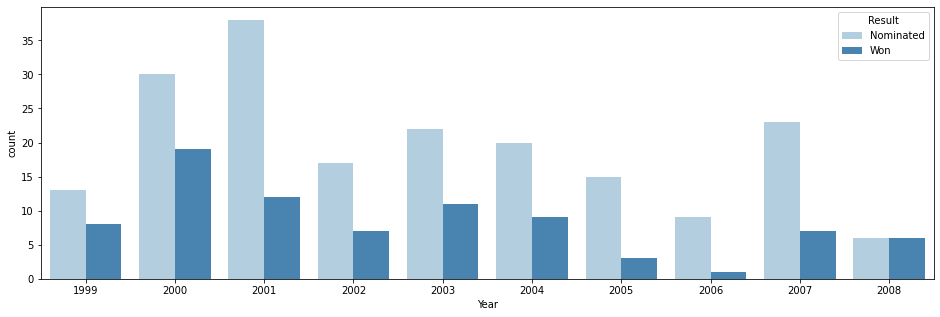

In [37]:
# Nominations from all the awards and their results

plt.figure(figsize = (16,5))
sns.countplot(x= 'Year', hue= 'Result', data = df, palette = 'Blues')

In [47]:
#Let's focus now only on the Primetime Emmy Awards

emmy = df[df["Award"] == 'Primetime Emmy Awards']
emmy

,Award,Year,Category,Nominee(s),Result
88,Primetime Emmy Awards,1999,Outstanding Drama Series,The Sopranos[Nom 19],Nominated
89,Primetime Emmy Awards,1999,Outstanding Directing for a Drama Series,"David Chase (for ""The Sopranos"")",Nominated
90,Primetime Emmy Awards,1999,Outstanding Writing for a Drama Series,"David Chase (for ""The Sopranos"")",Nominated
91,Primetime Emmy Awards,1999,Outstanding Writing for a Drama Series,"James Manos, Jr. and David Chase (for ""College"")",Won
92,Primetime Emmy Awards,1999,Outstanding Writing for a Drama Series,"Frank Renzulli (for ""Nobody Knows Anything"")",Nominated
...,...,...,...,...,...
154,Primetime Emmy Awards,2007,Outstanding Lead Actor in a Drama Series,James Gandolfini,Nominated
155,Primetime Emmy Awards,2007,Outstanding Lead Actress in a Drama Series,Edie Falco,Nominated
156,Primetime Emmy Awards,2007,Outstanding Supporting Actor in a Drama Series,Michael Imperioli,Nominated
157,Primetime Emmy Awards,2007,Outstanding Supporting Actress in a Drama Series,Lorraine Bracco,Nominated


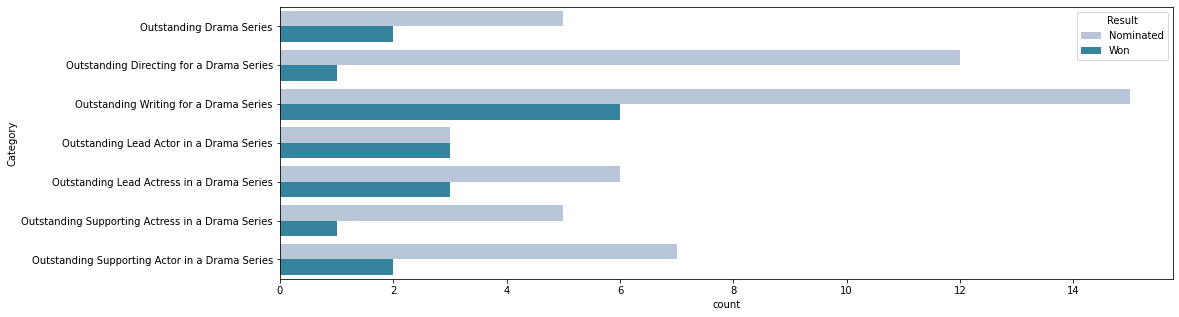

In [40]:
#Primetime Emmy Awards result by categories 

plt.figure(figsize = (16,5))
sns.countplot(y= 'Category', hue= 'Result', data = emmy, palette = 'PuBuGn')

In [41]:
emmy['Result'].value_counts()

Nominated    53
Won          18
Name: Result, dtype: int64

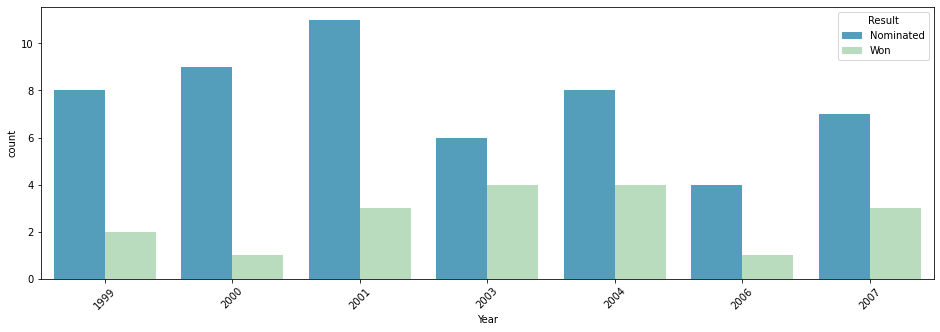

In [42]:
#Primetime Emmy Awards result by year 

plt.figure(figsize = (16,5))
plt.xticks(rotation=45)

sns.countplot(x= 'Year', hue= 'Result', data = emmy, palette = 'GnBu_r')